In [115]:
# Import necessary libraries

# Import the numpy library, often used for numerical operations
import numpy as np 

# Import the pandas library, used for data manipulation and analysis
import pandas as pd 

##File path to the book data file
file_path_book = r'C:\Users\Dell-pc\Desktop\Book Recommender System\data_source\Books.csv'
#file path to user data file 
file_path_user= r'C:\Users\Dell-pc\Desktop\Book Recommender System\data_source\Users.csv'
#file path to ratings file 
file_path_ratings= r'C:\Users\Dell-pc\Desktop\Book Recommender System\data_source\Ratings.csv'


### Load Dataset  and  Understand the Data Structure

In [116]:
# Load the 'Books.csv' dataset into the 'book' DataFrame
book = pd.read_csv(file_path_book)

# Load the 'Users.csv' dataset into the 'users' DataFrame
users = pd.read_csv(file_path_user)

# Load the 'Ratings.csv' dataset into the 'rating' DataFrame
ratings = pd.read_csv(file_path_ratings)


C:\Users\Dell-pc\AppData\Local\Temp\ipykernel_7144\985512542.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv(file_path_book)


In [117]:
# Display the first 2 rows of the 'book' DataFrame to show a preview of the data
book.head(2)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [118]:
# Display the first 2 rows of the 'Users ' DataFrame to show a preview of the data
users.head(2)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [119]:
# Display the first 2 rows of the 'rating' DataFrame to show a preview of the data
ratings.head(2)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


### Check The  Dataset Dimensions

In [120]:
# Print the shape of the 'book' DataFrame to show its dimensions (number of rows and columns)
print("The shape of the book DataFrame:", book.shape)

# Print the shape of the 'Users ' DataFrame to show its dimensions (number of rows and columns)
print("The shape of the users DataFrame:", users.shape)

# Print the shape of the 'rating ' DataFrame to show its dimensions (number of rows and columns)
print("The shape of the ratings DataFrame:", ratings.shape)


The shape of the book DataFrame: (271360, 8)
The shape of the users DataFrame: (278858, 3)
The shape of the ratings DataFrame: (1149780, 3)


### Check The Null value in Dataset

In [121]:
# Check for missing values in the users dataset
missing_values = users.isnull().sum()

# Display the results
print(missing_values)


User-ID          0
Location         0
Age         110762
dtype: int64


In [122]:

# Check for missing values in book dataset 
missing_values = book.isnull().sum()
#disply the result 
print(missing_values)


ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [123]:
#Check for missing value in ratings data set 
missing_values =ratings.isnull().sum()
#print the missing value 
print(missing_values)


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


### Check The Duplicate in Dataset 

In [124]:
#Check the Duplicte value in ratings dataset 
ratings.duplicated().sum()


np.int64(0)

In [125]:
#check the duplicted value in users dataset
users.duplicated().sum()


np.int64(0)

In [126]:
#check the duplicted value in book dateset 
book.duplicated().sum()


np.int64(0)

### Merage The DateSet

In [127]:
 # 'User' DataFrame has a column 'User-ID' and 'ratings' DataFrame has a column 'User-ID'
# Merge based on 'User-ID'
 ratings_new_data = pd.merge(ratings, users, on='User-ID')

# Print first few rows of merged data for verification
ratings_new_data.head()


,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0


In [128]:
# Merge DataFrames based on 'User-ID'
full_book_data = pd.merge(ratings_new_data, book, on='ISBN')

# Print the first few rows of the merged DataFrame
full_book_data.head()


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,"seattle, washington, usa",NaN,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


### Check The Informaction about all dataset  columan

In [129]:
 #use info function check columan datatype and value 
 full_book_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Location             1031136 non-null  object 
 4   Age                  753301 non-null   float64
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031134 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


### Data Visualization

C:\Users\Dell-pc\AppData\Local\Temp\ipykernel_7144\1986835801.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ratings_count.index, y=ratings_count.values, palette=color_palette)


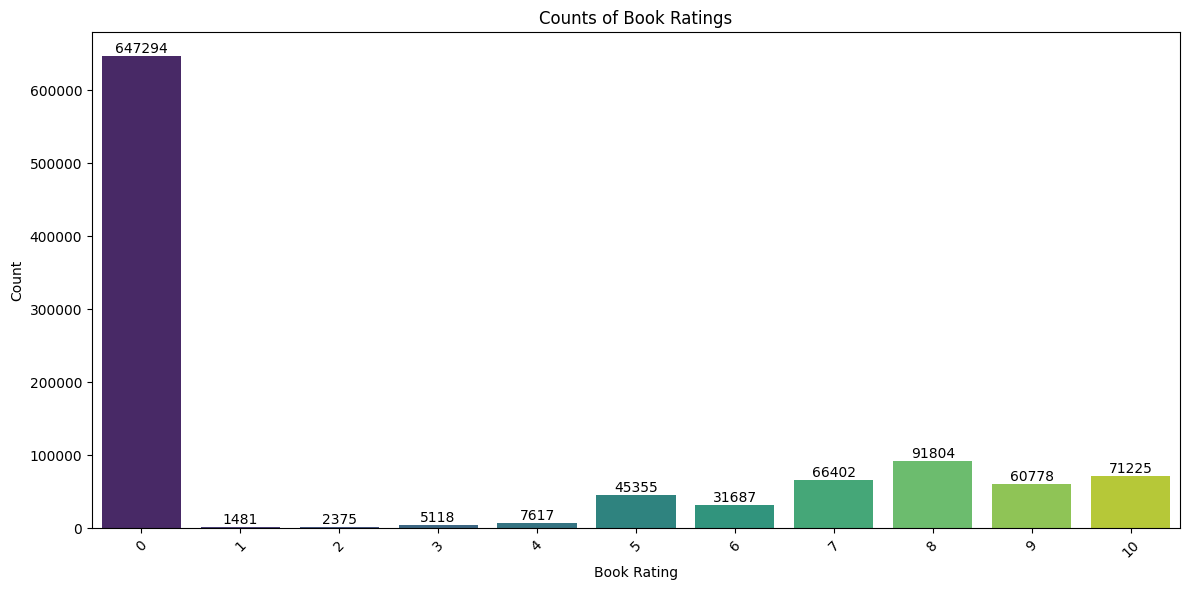

In [130]:
# Import necessary libraries for plotting

# Importing the pyplot module from matplotlib for creating visualizations
import matplotlib.pyplot as plt

# Importing the seaborn library for advanced visualizations and aesthetic plots
import seaborn as sns

# Assuming 'full_book_data' is your DataFrame containing book ratings

# Counting the occurrences of each rating value in the 'Book-Rating' column
# value_counts() counts the number of times each unique value appears in the column
# sort_index() sorts the result by the rating values (index)
ratings_count = full_book_data['Book-Rating'].value_counts().sort_index()

# Generate a color palette based on the number of unique ratings
# 'viridis' is a color palette provided by seaborn, and the number of colors generated
# is equal to the number of unique rating values
color_palette = sns.color_palette('viridis', len(ratings_count))

# Plotting the distribution of book ratings

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn with custom colors from the generated palette
# x=ratings_count.index provides the rating values for the x-axis
# y=ratings_count.values provides the count of each rating value for the y-axis
# palette=color_palette sets the colors for the bars
ax = sns.barplot(x=ratings_count.index, y=ratings_count.values, palette=color_palette)

# Set the title of the plot
plt.title('Counts of Book Ratings')

# Set the label for the x-axis
plt.xlabel('Book Rating')

# Set the label for the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the plot layout to make sure everything fits without overlapping
plt.tight_layout()

# Adding count numbers on top of each bar
# Iterate over each patch (bar) in the plot
for p in ax.patches:
    # Annotate the height (count) on top of each bar
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), # Position of the text
                ha='center', va='center', fontsize=10, color='black', # Text properties
                xytext=(0, 5), textcoords='offset points') # Offset the text by 5 points vertically

# Display the plot
plt.show()


In [131]:
##Calculate count, minimum, maximum, and mean of Book-Rating
count_ratings = full_book_data['Book-Rating'].count()
min_rating = full_book_data['Book-Rating'].min()
max_rating = full_book_data['Book-Rating'].max()
mean_rating = full_book_data['Book-Rating'].mean()

# Print the results
print("Count of Book Ratings:", count_ratings)
print("Minimum Book Rating:", min_rating)
print("Maximum Book Rating:", max_rating)
print("Mean Book Rating:", mean_rating)


Count of Book Ratings: 1031136
Minimum Book Rating: 0
Maximum Book Rating: 10
Mean Book Rating: 2.839051298761754


 ## Popularity-Based Recommender Systems:

Popularity-based recommender systems recommend items to users based on their general popularity or trending status among all users. They do not consider individual user preferences but instead focus on suggesting items that have high overall engagement metrics such as views, purchases, or ratings. These systems are straightforward to implement and understand, making them suitable for scenarios where personalization based on user preferences is not a priority. However, they may not provide relevant recommendations for users with specific tastes or for niche items that have not yet gained popularity. Despite these limitations, popularity-based systems serve as a useful starting point in recommendation systems, especially for new users or when detailed user data is limited.

In [132]:
# Calculate the number of ratings for each book title and filter books with 250 or more ratings

# 'full_book_data' is assumed to be a DataFrame containing data about books, including their titles and ratings.

# Group the DataFrame by 'Book-Title' and count the number of ratings for each book
# This creates a new DataFrame 'num_Rating_df' where each row represents a book title and its number of ratings.
num_Rating_df = full_book_data.groupby('Book-Title').count()['Book-Rating'].reset_index()

# Rename the column 'Book-Rating' to 'num_ratings' for clarity
# This makes the DataFrame easier to understand by renaming the column that represents the count of ratings.
num_Rating_df.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)


In [133]:
# Display the first few rows of the num_Rating_df DataFrame

# This allows us to inspect the initial records of num_Rating_df,
# showing the book titles and their corresponding number of ratings.
num_Rating_df.head()


,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [134]:
# Calculate the average ratings for each book

# 'full_book_data' is assumed to be a DataFrame containing data about books, including their titles and ratings

# Group the DataFrame by 'Book-Title' and calculate the mean of the 'Book-Rating' for each group
# This results in a new DataFrame where each row corresponds to a book title and its average rating
avg_rating_df = full_book_data.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Rename the 'Book-Rating' column to something more descriptive, if needed
# The .rename method is used to change column names in the DataFrame
avg_rating_df.rename(columns={'Book-Rating': 'Avg_Rating'}, inplace=True)


In [135]:
# Display the first 5 rows of the avg_rating_df DataFrame to inspect the results
# This allows us to see a sample of the average ratings calculated for each book
avg_rating_df.shape


(241071, 2)

In [136]:
# Merge two DataFrames based on the 'Book-Title' column

# 'num_Rating_df' and 'avg_rating_df' are assumed to be DataFrames containing related information about books,
# with 'num_Rating_df' having the number of ratings for each book and 'avg_rating_df' having the average ratings.

# Merge the two DataFrames using the 'Book-Title' column as the key for merging
# This operation combines the information from both DataFrames into a single DataFrame, 'popular_df',
# where each row corresponds to a book title, along with its number of ratings and average rating.
popular_df = num_Rating_df.merge(avg_rating_df, on='Book-Title')


In [137]:
popular_df.shape


(241071, 3)

In [138]:
# Filter books with 250 or more ratings
# 'popular_df' is assumed to be a DataFrame containing book information
# The DataFrame is being filtered to include only rows where the 'num_ratings' column has a value of 250 or more
# After filtering, the resulting DataFrame is sorted by the 'Avg_rating' column in descending order
# Finally, the top 50 rows of the sorted DataFrame are selected and displayed
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('Avg_Rating', ascending=False).head(5)


In [139]:
##prea the final use for popularty base recend system 
popular_df = popular_df.merge(book, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'Avg_Rating']]


In [140]:
popular_df.head()


,Book-Title,Book-Author,Image-URL-M,num_ratings,Avg_Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


 ## Collaborative Filtering Based Recommender

 Filtering: Recommends items based on the preferences and behaviors of similar users or items. It can be user-based (recommending items liked by users with similar tastes) or item-based (recommending similar items to those previously liked).